# Physik der sozio-ökonomischen Systeme mit dem Computer
# (Physics of Socio-Economic Systems with the Computer)

### Vorlesung gehalten an der J.W.Goethe-Universität in Frankfurt am Main 
#### (Sommersemester 2024)

### von Dr.phil.nat. Dr.rer.pol. Matthias Hanauske

### Frankfurt am Main 21.05.2024


### Dritter Vorlesungsteil:  
### Evolutionäre räumliche Spiele (spatial games)
#### Beispiel: Dominante Spiele


## Einführung

Die Verkn&uuml;pfung der Theorie komplexer Netzwerke (siehe Teil II der Vorlesung) mit der evolution&auml;ren Spieltheorie (siehe Teil I der Vorlesung) stellt ein vielversprechendes mathematisches Modell dar, welches sowohl der interdisziplin&auml;ren Grundlagenforschung, als auch der angewandten, empirischen Netzwerkforschung dienen kann. In diesem Kapitel wird die Vorgehensweise einer Miteinbeziehung komplexer Netzwerktopologien in die evolution&auml;re Spieltheorie beschrieben. Die dann auf einem solchen komplexen Netzwerk ablaufenden Entscheidungsprozesse k&ouml;nnen in den meisten F&auml;llen lediglich mittels nummerischer, Agenten-basierter Computersimulationen veranschaulicht werden.

In diesem Jupyter Notebook werden die Spieler einer endlich gro&szlig;en Population auf einem r&auml;umlichen Gitter angeordnet, wobei jeder Spieler nur mit seinen n&auml;chsten Nachbarn spielen kann (<i>Moore Nachbarschaft</i>). Das zugrundeliegende Netzwerk der Spielerknoten besitzt somit eine einfache regul&auml;re Struktur und im betrachteten 2-dimensionalen Fall spielt jeder Spieler pro Spielperiode mit acht Spielern (Knotengrad $k_i=8\, \forall\, i \in {\cal I}$). Wir beschr&auml;nken uns im folgenden auf symmetrische (2x2)-Spiele und benutzen den Ansatz eines allgemeinen (2 Personen)-(2 Strategien) Spiels mit symmetrischer Auszahlungsmatrix und Parametern a, b, c und d. Die Spielerknoten spielen pro Iteration mit jedem ihrer Nachbarn und  am Ende von jedem Zeitschritt vergleichen die Spieler ihren summierten Gewinn/Verlust mit den Nachbarspielern ihres Umfeldes. Ist die Auszahlung eines Spielers h&ouml;her als der eigene Auszahlungswert, so &auml;ndern der Spieler in der n&auml;chsten Spielperiode seine Strategie; ist sein eigener Wert der h&ouml;chste, so bleibt er auch in der n&auml;chsten Iteration bei seiner gespielten Strategie.

Im Folgenden betrachten wir ein Beispiel, das an das 9. Kapitel des Buches <A href="http://www.hup.harvard.edu/catalog.php?isbn=9780674023383" target=blank>Martin A. Nowak, Evolutionary Dynamics - Exploring the Equations of Life, 2006</A>  angelehnt ist und ein Gefangenendilemma auf einem r&auml;umlichen 2-dimensionalen Gitter beschreibt. In Abh&auml;ngigkeit der St&auml;rke der Dominanz der Strategie und der Anfangskonfiguration der Strategienwahl der Spieler sind unterschiedliche zeitlichen Entwicklungen der Population m&ouml;glich. Wir nehmen im Folgenden ein dominantes, symmetrisches 2x2-Spiel mit folgender Auszahlungsmatrix an:

$   \hat{\bf {\cal \$}}=
  \left( {\begin{array}{cc}
   1 & 0 \\
   c & 0.01 \\
  \end{array} } \right)
$

Es handelt sich bei diesem Spiel um eine Version des Gefangenendilemmas, wobei der Parameter $c>1$ die St&auml;rke der Dominanz der Strategie $s_2\hat{=}$<i>Rot</i> &uuml;ber die Strategie $s_1\hat{=}$<i>Blau</i> quantifiziert. 

Wir erzeugen zunächst das räumliche Netzwerk der Spieler und stellen dies dar. Im Anfangsnetzwerk, zur Zeit t=0 initialisieren wir die Strategienwahl der Spieler, dass alle außer einem Spieler die Strategie $s_1\hat{=}$<i>Blau</i> spielen. Den Spieler, der $s_2\hat{=}$<i>Rot</i> spielt, platzieren wir nahe der Mitte des räumlichen Gitters.

In [1]:
import networkx as nx
from random import randint
import numpy as np

G = nx.Graph()
Nx = 15
Ny = 15
N = int(Nx*Ny)
PropPlayers = np.zeros([N,10])

In [2]:
k = 0
ColorPlayer = []
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
#        strategy=randint(0, 1)#Zufaellige Strategienwahl 
        if k == int(N/2):
            strategy = 0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            strategy = 1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        PropPlayers[k,3] = strategy 
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

In [3]:
import plotly.graph_objects as go

In [4]:
class PlotNetwork:
    """Klasse zum Darstellen des 3D-Netzwerks mittels des Plotly Moduls (Gitteranordnung)"""
    def __init__(self, G):
        node_x = [PropPlayers[k,1] for k in range(N)]
        node_y = [PropPlayers[k,2] for k in range(N)]
        node_z = [0 for k in range(N)]
        edge_x = []
        edge_y = []
        edge_z = []
        for edge in G.edges():
            edge_x += [PropPlayers[edge[0],1],PropPlayers[edge[1],1], None]
            edge_y += [PropPlayers[edge[0],2],PropPlayers[edge[1],2], None]
            edge_z += [0,0, None]
        labels = []
        for node in sorted(G.nodes()):
            labels.append('Knoten '+str(node)+', Nachbarn = '+str(list(G.neighbors(node))))
    
        edge_trace = go.Scatter3d(x=edge_x,
                       y=edge_y,
                       z=edge_z,
                       mode='lines',
                       line=dict(color='black', width=1.1),
                       hoverinfo='none'
                       )
    
        node_trace = go.Scatter3d(x=node_x,
                       y=node_y,
                       z=node_z,
                       mode='markers',
    #               name='actors',
                       marker=dict(symbol='circle',
                                     size=6,
                                     color=ColorPlayer,
                                     line=dict(color='black', width=0.8)
                                     ),
                       text=labels,
                       opacity=0.9,
                       hoverinfo='text'
                       )
        axis = dict(showbackground=False,
                  backgroundcolor="white",
                  showline=False,
                  zeroline=False,
                  showgrid=True,
                  gridcolor="rgb(244, 233, 245)",
                  showticklabels=False,
                  showaxeslabels=False,
                  )
    
        layout = go.Layout(
                 width=700,
                 height=700,
                 showlegend=False,
                 scene=dict(
                     xaxis=dict(axis),
                     yaxis=dict(axis),
                     zaxis=dict(axis),
                ),
            margin=dict(b=20,l=10,r=10,t=10),
            hovermode='closest'
           )
        data = [node_trace,edge_trace]
        fig = go.Figure(data=data, layout=layout)
        fig.show()

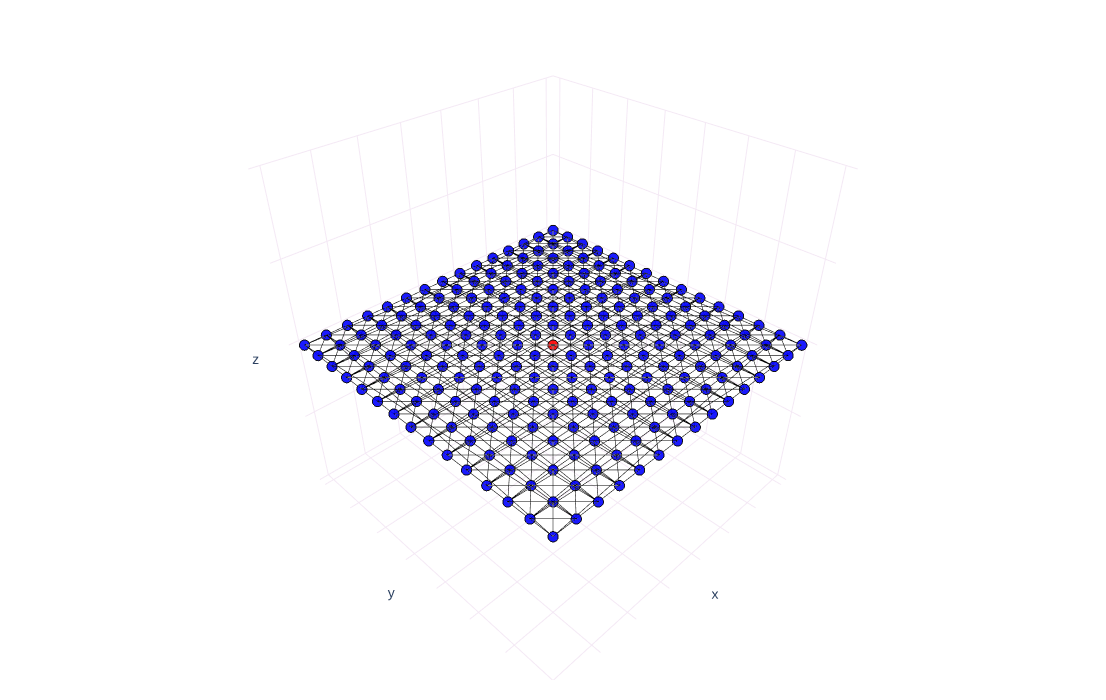

In [5]:
PlotNetwork(G);

Die räumliche Gitterstruktur des Netzwerkes ist gut erkennbar. Der Knotengrad ist bei allen Knoten gleich, da jeder Knoten acht Kanten hat bzw. acht Nachbarn (Spielpartner) besitzt. Man kann sich das Netzwerk auch in einem anderen Layout betrachten, z.B. im Fruchterman Reingold Layout:

In [6]:
class PlotNetwork1:
    """Klasse zum Darstellen des 3D-Netzwerks mittels des Plotly Moduls (Fruchterman Reingold Layout)"""
    def __init__(self, G):
        pos3d=nx.fruchterman_reingold_layout(G,dim=3)
    #    pos3d=nx.kamada_kawai_layout(G,dim=3)
    #    pos3d=nx.spring_layout(G, dim=3)
    #    pos3d=nx.circular_layout(G, dim=3)
    #    pos3d=nx.spectral_layout(G, dim=3)
        node_x=[pos3d[k][0] for k in range(N)]
        node_y=[pos3d[k][1] for k in range(N)]
        node_z=[pos3d[k][2] for k in range(N)]
        edge_x = []
        edge_y = []
        edge_z = []
        for edge in G.edges():
            edge_x+=[pos3d[edge[0]][0],pos3d[edge[1]][0], None]
            edge_y+=[pos3d[edge[0]][1],pos3d[edge[1]][1], None]
            edge_z+=[pos3d[edge[0]][2],pos3d[edge[1]][2], None]
        labels=[]
        for node in sorted(G.nodes()):
            labels.append('Knoten '+str(node)+', Nachbarn = '+str(list(G.neighbors(node))))
    
        edge_trace=go.Scatter3d(x=edge_x,
                       y=edge_y,
                       z=edge_z,
                       mode='lines',
                       line=dict(color='black', width=1.1),
                       hoverinfo='none'
                       )
    
        node_trace=go.Scatter3d(x=node_x,
                       y=node_y,
                       z=node_z,
                       mode='markers',
    #               name='actors',
                       marker=dict(symbol='circle',
                                     size=6,
                                     color=ColorPlayer,
                                     line=dict(color='black', width=0.8)
                                     ),
                       text=labels,
                       opacity=0.9,
                       hoverinfo='text'
                       )
        axis=dict(showbackground=False,
                  backgroundcolor="white",
                  showline=False,
                  zeroline=False,
                  showgrid=True,
                  gridcolor="rgb(244, 233, 245)",
                  showticklabels=False,
                  showaxeslabels=False,
                  )
    
        layout = go.Layout(
                 width=700,
                 height=700,
                 showlegend=False,
                 scene=dict(
                     xaxis=dict(axis),
                     yaxis=dict(axis),
                     zaxis=dict(axis),
                ),
            margin=dict(b=20,l=10,r=10,t=10),
            hovermode='closest',
           )
        data=[node_trace,edge_trace]
        fig=go.Figure(data=data, layout=layout)
        fig.show()

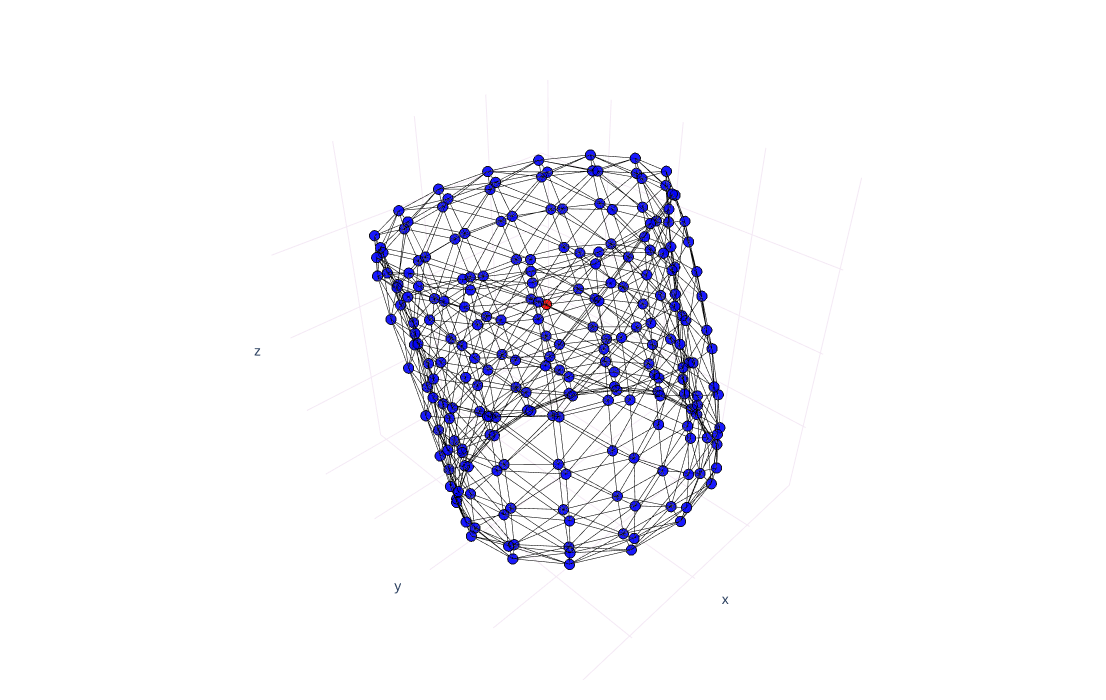

In [7]:
PlotNetwork1(G);

Wir werden im Folgenden das Spiel auf diesem Netzwerk definieren. Wir legen zunächst die Gefangenendilemma-ähnliche Auszahlungsmatrix der Spieler ( $\hat{\bf {\cal \$}}$ ) fest, wobei wir den Parameter c auf $c=1.63$ festlegen:

In [8]:
a = 1
b = 0
c = 1.63
d = 0.01

Obwohl wir zunächst nur reine Strategien zulassen, definieren wir eine gemischte Auszahlungsfunktion ${\bf \tilde{\cal \$}}(x,y)$ der Spieler:

In [9]:
def Dollar(x,y):
    GemischteAuszahlung = a*x*y+b*x*(1-y)+c*(1-x)*y+d*(1-x)*(1-y)
    return GemischteAuszahlung

Jeder Spieler spielt das vorgegebene Spiel nun mit seinen nächsten Nachbarn. Den gesamten Gewinn/Verlust speichern wir uns in den Variablen PropPlayers[:,4].

In [10]:
for games in list(G.edges):
    PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
    PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 

Nach der ersten Spielrunde erhalten die Spieler somit die folgenden Auszahlungen:

In [11]:
print("Kumulierte Auszahlung für den roten Spieler")
print(PropPlayers[112,4])
print("Kumulierte Auszahlung für die Nachbarn des roten Spielers")
print(PropPlayers[111,4])
print("Kumulierte Auszahlung für alle anderen Spieler")
print(PropPlayers[110,4])

Kumulierte Auszahlung für den roten Spieler
13.039999999999996
Kumulierte Auszahlung für die Nachbarn des roten Spielers
7.0
Kumulierte Auszahlung für alle anderen Spieler
8.0


Jeder Spieler vergleicht nun seine eigenen Auszahlungswerte mit seinen Nachbarn und legt seine Strategie für die nächste Spielperiode fest (zukünftige Strategie wird in PropPlayers[:,5] gespeichert). Die Spieler übernehmen die Strategie des Nachbarspielers mit der höchsten Auszahlung. Falls keiner der Nachbarn eine höhere Auszahlung hat, bleiben sie bei ihrer Strategie.  

In [12]:
for n in range(0,N):
    PropPlayers[n,5] = PropPlayers[n,3]
    maxpayoff = PropPlayers[n,4]
    for neig in list(G.neighbors(n)):
        if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
            maxpayoff = PropPlayers[neig,4]
            PropPlayers[n,5] = PropPlayers[neig,3]

Wir legen die zukünftige Farbe (Strategienwahl) fest und löschen die kumulierte Auszahlung für das nächste Spiel.

In [13]:
ColorPlayernew = []
for n in range(0,N):
    if PropPlayers[n,5] == 0:
        ColorPlayernew.append("red")
    if PropPlayers[n,5] == 1:
        ColorPlayernew.append("blue") 
    PropPlayers[n,3] = PropPlayers[n,5]
    PropPlayers[n,4] = 0

In [14]:
print("Neue Strategie des roten Spielers (rot=0, blau=1)")
print(PropPlayers[112,5])
print("Neue Strategie der Nachbarn des roten Spielers")
print(PropPlayers[111,5])
print("Neue Strategie aller anderen Spieler")
print(PropPlayers[110,5])

Neue Strategie des roten Spielers (rot=0, blau=1)
0.0
Neue Strategie der Nachbarn des roten Spielers
0.0
Neue Strategie aller anderen Spieler
1.0


Wir stellen die Entwicklung der Strategienwahl nun in einer Animation dar und betrachten hierfür eine größere Population

In [15]:
import matplotlib.pyplot as plt 
import matplotlib
import matplotlib.animation as animation
from IPython.display import HTML
params = {
    'figure.figsize'    : [4.5,4.5],
#    'text.usetex'       : True,
    'axes.titlesize' : 14,
    'axes.labelsize' : 16,  
    'xtick.labelsize' : 14 ,
    'ytick.labelsize' : 14 
}
matplotlib.rcParams.update(params)

In [16]:
c=1.63

G = nx.Graph()
Nx = 35
Ny = 35
N = int(Nx*Ny)
PropPlayers = np.zeros([N,10])

k=0
ColorPlayer = []
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
#        strategy=randint(0, 1)#Zufaellige Strategienwahl 
        if k == int(N/2):
            strategy = 0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            strategy = 1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        PropPlayers[k,3] = strategy 
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

fig = plt.figure()
ax = fig.gca()

def init():
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=32,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    return fig,

def animate(i):
    ax.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff = PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []   
    for n in range(0,N):
        if PropPlayers[n,5] == 0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5] == 1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3] == 0:
            ColorPlayer.append("red")
        if PropPlayers[n,3] == 1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=34,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=50,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die obere Animation zeigt das zeitliche Verhalten der Strategienwahl der $N=35 \cdot 35=1225$ Spieler des räumlichen Spiels bei der Parameterwahl $c=1.63$. Die entstehende fraktalen Strukturen entwickeln sich schließlich zu einem Zustand, in dem alle Spieler die dominante rote Strategie spielen. Dies ist jedoch in räumlichen Spielen, im Gegensatz zur klassischen evolutionären Spieltheorie, bei dominanten Spielen nicht immer der Fall und hängt zusätzlich noch von der Größe und Struktur des zugrundeliegenden Netzwerkes ab. 

Wir erhöhen die Anzahl der Spieler auf dem räumlichen Gitter ($N=65 \cdot 65=4225$) und betrachten uns wieder die obere Simulation erneut.

In [17]:
c=1.63

G = nx.Graph()
Nx = 65
Ny = 65
N = int(Nx*Ny)
PropPlayers = np.zeros([N,10])

k=0
ColorPlayer = []
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
#        strategy=randint(0, 1)#Zufaellige Strategienwahl 
        if k == int(N/2):
            strategy = 0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            strategy = 1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        PropPlayers[k,3] = strategy 
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

fig = plt.figure()
ax = fig.gca()

def init():
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=34,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    return fig,

def animate(i):
    ax.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff = PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []   
    for n in range(0,N):
        if PropPlayers[n,5] == 0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5] == 1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3] == 0:
            ColorPlayer.append("red")
        if PropPlayers[n,3] == 1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=15,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=100,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die obere Animation zeigt, dass die entstehenden fraktalen Strukturen sich nicht zu einem Zustand entwickeln, in dem alle Spieler die dominante rote Strategie spielen, sondern sich ein dynamisches Gleichgewicht entwickelt.

In Abh&auml;ngigkeit des Parameters c k&ouml;nnen nun die folgenden zeitlichen Entwicklungen stattfinden: $\forall c<1.2$ entsteht in der zweiten Spielperiode ein Rechteck aus 9 roten Knoten welches aber dann schon in der dritten Spielperiode wieder in einen einzelnen roten Zentrumsknoten &uuml;bergeht; $\forall 1.2 < c < 1.4$ entsteht in der zweiten Spielperiode wiederum ein Rechteck aus 9 roten Knoten, in der dritten Spielperiode entsteht ein rotes Kreuz, das dann wiederum in den einzelnen roten Zentrumsknoten &uuml;bergeht; $\forall 1.4 <= c < 1.6$ bleibt das in der zweiten Spielperiode entstehende Rechteck aus 9 roten Knoten stabil; $\forall c>1.6$ dehnt sich der Bereich der roten Spieler immer weiter aus, wobei es zu einer dynamischen Fraktalbildung, evolution&auml;ren Kaleidoskopen und chaotischen Verhalten kommen kann (siehe obere Animationen).

Wir betrachten uns die zeitliche Entwicklung für einen leicht erhöhten Parameter $c=1.66$:

In [18]:
c=1.66

G = nx.Graph()
Nx = 65
Ny = 65
N = int(Nx*Ny)
PropPlayers = np.zeros([N,10])

k = 0
ColorPlayer = []
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
#        strategy=randint(0, 1)#Zufaellige Strategienwahl 
        if k == int(N/2):
            strategy = 0 #entspricht Strategie s_2
            ColorPlayer.append("red")
        else:
            strategy = 1 #entspricht Strategie s_1
            ColorPlayer.append("blue")
        PropPlayers[k,3] = strategy 
        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

fig = plt.figure()
ax = fig.gca()

def init():
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=34,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    return fig,

def animate(i):
    ax.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff = PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []   
    for n in range(0,N):
        if PropPlayers[n,5] == 0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5] == 1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3] == 0:
            ColorPlayer.append("red")
        if PropPlayers[n,3] == 1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=15,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=35,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Man erkennt, dass sich nun die rote Strategie, unabhängig von der Größe des räumlichen Gitters, durchsetzt.

Platziert man jedoch einen einzelnen blauen Spieler in ein Umfeld von roten Spielern, so kann dieser sich nicht durchsetzen und verschwindet in der zweiten Spielperiode. Erst eine Anordnung von 9 blauen Knoten kann sich durchsetzen, falls $\forall c < 8/3 \approx 2.667$ und es entstehen wiederum analytische bestimmbare Grenzbereiche des evolution&auml;ren Verhaltens des Populationsnetzwerkes in Abh&auml;ngigkeit des Parameters c (siehe S:153 in <A href="http://www.hup.harvard.edu/catalog.php?isbn=9780674023383" target=blank>Martin A. Nowak, Evolutionary Dynamics - Exploring the Equations of Life, 2006</A>).

Zusammenfassend stellt man fest, dass sich die dominante Strategie bei räumlichen Spielen nicht zwangsläufig durchsetzt und von der Stärke der Dominanz des Spiels (Größe des Parameters c) abhängt.

Zusätzlich hängt das zeitliche Verhalten der Strategienwahl der Population von den gewählten Anfangsbedingungen der Strategienwahl ab. Am Ende dieses Jupyter Notebooks betrachten wir eine spezielle Anfangsbedingung, die sogenannte "Walker-Anfangsbedingung". Benutzt man diese Anfangskonfiguration der Strategienwahl und wählt den Parameter $c<1.65$ (hier speziell $c=1.64$), so bewegen sich die zwei implementierten "Walker Struktur" zum Zentrum des Spielernetzwerks und verursachen nach ihrer Kollision eine Art von explosionsartiger Ausbreitung der blauen Strategie. Obwohl es sich um ein mittel-stark dominantes Spiel handelt, setzt sich die rote (dominante) Strategie auch für große Zeiten nicht durch und die Strategienwahl der Population endet in einem dynamischen Gleichgewicht der Koexistenz der blauen und roten Strategie.

In [19]:
c=1.64

G = nx.Graph()
Nx = 30
Ny = 30
N = int(Nx*Ny)
PropPlayers = np.zeros([N,10])

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
#        strategy=randint(0, 1)#Zufaellige Strategienwahl 
        if k in [301,302,303,304,333,334,363,364,393,394,475,476,505,506,535,536,565,566,567,568]:
            PropPlayers[k,3] = 1
            ColorPlayer.append("blue")
        else:
            ColorPlayer.append("red")
            PropPlayers[k,3] = 0        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

fig = plt.figure()
ax = fig.gca()

def init():
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=34,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    return fig,

def animate(i):
    ax.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff = PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []   
    for n in range(0,N):
        if PropPlayers[n,5] == 0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5] == 1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3] == 0:
            ColorPlayer.append("red")
        if PropPlayers[n,3] == 1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=35,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=48,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Wir erhöhen wieder die Anzahl der Spieler auf dem räumlichen Gitter: $N=65 \cdot 65=4225$

In [20]:
c=1.64

G = nx.Graph()
Nx = 65
Ny = 65
N = int(Nx*Ny)
PropPlayers = np.zeros([N,10])

k=0
ColorPlayer=[]
for i in range(0,Nx):
    for j in range(0,Ny):
        G.add_node(k)
        PropPlayers[k,0] = k #Knotennummer
        PropPlayers[k,1] = i #x-Koordinate auf dem 2-D Gitter
        PropPlayers[k,2] = j #y-Koordinate auf dem 2-D Gitter
#        strategy=randint(0, 1)#Zufaellige Strategienwahl 
        if k in [Nx*30+1,Nx*30+2,Nx*30+3,Nx*30+4,Nx*31+3,Nx*31+4,Nx*32+3,Nx*32+4,Nx*33+3,
                 Nx*33+4,Nx*36-3,Nx*36-4,Nx*37-3,Nx*37-4,Nx*38-3,Nx*38-4,Nx*39-1,Nx*39-2,Nx*39-3,Nx*39-4]:
            PropPlayers[k,3] = 1
            ColorPlayer.append("blue")
        else:
            ColorPlayer.append("red")
            PropPlayers[k,3] = 0        
        center = i*Ny + j
        upperleft = ((i-1)%Nx)*Ny + (j-1)%Ny
        up = ((i  )%Nx)*Ny + (j-1)%Ny
        upperright = ((i+1)%Nx)*Ny + (j-1)%Ny
        right = ((i+1)%Nx)*Ny + (j  )%Ny
        lowerright = ((i+1)%Nx)*Ny + (j+1)%Ny
        low = ((i  )%Nx)*Ny + (j+1)%Ny
        lowerleft = ((i-1)%Nx)*Ny + (j+1)%Ny
        left = ((i-1)%Nx)*Ny + (j  )%Ny
        G.add_edge(center, upperleft)
        G.add_edge(center, up)
        G.add_edge(center, upperright)
        G.add_edge(center, right)
        G.add_edge(center, lowerright)
        G.add_edge(center, low)
        G.add_edge(center, lowerleft)
        G.add_edge(center, left)
        k = k + 1

fig = plt.figure()
ax = fig.gca()

def init():
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=34,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    return fig,

def animate(i):
    ax.cla()
    for games in list(G.edges):
        PropPlayers[games[0],4] = Dollar(PropPlayers[games[0],3],PropPlayers[games[1],3]) + PropPlayers[games[0],4] 
        PropPlayers[games[1],4] = Dollar(PropPlayers[games[1],3],PropPlayers[games[0],3]) + PropPlayers[games[1],4] 
    for n in range(0,N):
        PropPlayers[n,5]=PropPlayers[n,3]
        maxpayoff = PropPlayers[n,4]
        for neig in list(G.neighbors(n)):
            if PropPlayers[neig,4] > PropPlayers[n,4] and PropPlayers[neig,4] > maxpayoff:
                maxpayoff = PropPlayers[neig,4]
                PropPlayers[n,5] = PropPlayers[neig,3]
    ColorPlayernew = []
    ColorPlayer = []   
    for n in range(0,N):
        if PropPlayers[n,5] == 0:
            ColorPlayernew.append("red")
        if PropPlayers[n,5] == 1:
            ColorPlayernew.append("blue")
        if PropPlayers[n,3] == 0:
            ColorPlayer.append("red")
        if PropPlayers[n,3] == 1:
            ColorPlayer.append("blue") 
        PropPlayers[n,3] = PropPlayers[n,5]
        PropPlayers[n,4] = 0
    ax.scatter(PropPlayers[:,1],PropPlayers[:,2],s=15,c=ColorPlayer,marker="s",alpha=1,edgecolor='none')
    ax.set_xlim(-0.75, Nx-0.25)
    ax.set_ylim(-0.75, Ny-0.25)
    ax.set_ylabel(r"$\rm y$")
    ax.set_xlabel(r"$\rm x$")
    ColorPlayer=ColorPlayernew
    return fig,

ani = animation.FuncAnimation(fig,animate,init_func=init,frames=100,interval=400)

plt.close(ani._fig)

HTML(ani.to_html5_video())

Die in diesem Jupyter Notebook dargestellten Ergebnisse können ebenfalls in den folgenden Python Programmen simuliert werden.
<ul>
      <li><A href="https://itp.uni-frankfurt.de/~hanauske/VPSOC/2024/python/VPSOC_GamesonNetwork_2024.py" target=blank> VPSOC_GamesonNetwork_2024.py</A>: Kleines Gitter mit Angabe der erzielten Auszahlungen der Spieler. Zusätzliche Grafiken: Populationsvektor $x(t)$, Verteilungsfunktion der Knotengrade $P(k)$ und Bild des Netzwerks</li>
      <li><A href="https://itp.uni-frankfurt.de/~hanauske/VPSOC/2024/python/VPSOC_GamesonNetwork_walker_2024.py" target=blank> VPSOC_GamesonNetwork_walker_2024.py</A>: Mittelgroßes Gitter ($30 \cdot 30$) ohne Auszahlungen mit "Walker-Anfangsbedingung"</li>
      <li><A href="https://itp.uni-frankfurt.de/~hanauske/VPSOC/2024/python/VPSOC_GamesonNetwork_dominant_big2024.py" target=blank> VPSOC_GamesonNetwork_dominant_big2024.py</A>: Großes Gitter ($105 \cdot 105$) mit zusätzlicher Grafik des Populationsvektors $x(t)$</li> 
</ul>